In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

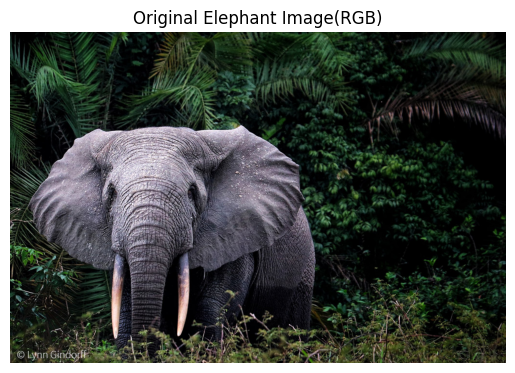

Image shape: (683, 1024, 3)


In [17]:
img = cv2.imread('elephant.jpg')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.Figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.title("Original Elephant Image(RGB)")
plt.axis("off")
plt.show()

print("Image shape:",img_rgb.shape)

In [18]:
!pip install ipyevents ipywidgets
from google.colab import output
output.enable_custom_widget_manager()

In [24]:
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from ipyevents import Event
from PIL import Image
from io import BytesIO

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Convert full-size image to PNG bytes
def array_to_png_bytes(arr):
    img_pil = Image.fromarray(arr)
    with BytesIO() as output_bytes:
        img_pil.save(output_bytes, format='PNG')
        return output_bytes.getvalue()

# Create image widget with original size
height, width, _ = img_rgb.shape
png_bytes = array_to_png_bytes(img_rgb)

image_widget = widgets.Image(
    value=png_bytes,
    format='png',
    layout=widgets.Layout(width=f"{width}px", height=f"{height}px")
)
display(image_widget)

# Setup event handler for clicks
event = Event(source=image_widget, watched_events=['click'])

def handle_event(event_data):
    x = int(event_data['offsetX'])
    y = int(event_data['offsetY'])
    print(f"Clicked at: X={x}, Y={y}")

event.on_dom_event(handle_event)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x02\xab\x08\x02\x00\x00\x00\xe0th\xc…

Clicked at: X=303, Y=211
Clicked at: X=360, Y=567
Clicked at: X=477, Y=322
Clicked at: X=380, Y=326
Clicked at: X=209, Y=325


In [25]:
sample_coords = [
    (303,211), #Head
    (360,567), #trunk
    (477,322), # ears
    (380,326), # eyes
    (209,325) # ear2
]

sample_rgb_values = []

for coord in sample_coords:
  y , x = coord
  rgb = img_rgb [y,x]
  sample_rgb_values.append(rgb)

for i in range(len(sample_coords)):
  coord = sample_coords[i]
  rgb = sample_rgb_values[i]
  print(f"P{i+1} at {coord} the rgb values is {rgb}")


P1 at (303, 211) the rgb values is [180 172 185]
P2 at (360, 567) the rgb values is [118 106 126]
P3 at (477, 322) the rgb values is [77 74 81]
P4 at (380, 326) the rgb values is [135 124 140]
P5 at (209, 325) the rgb values is [203 191 205]


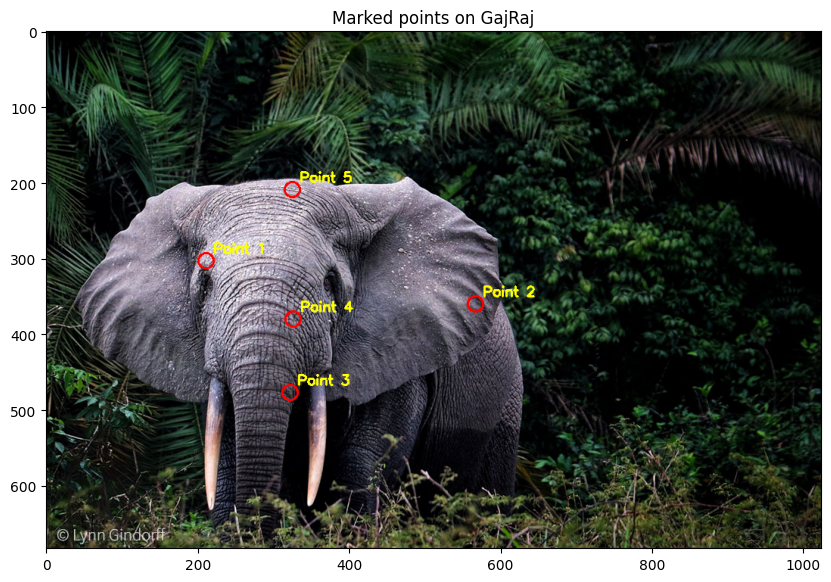

In [26]:
# Mark your points on the image

image_marked= img_rgb.copy()
index=1
for i in range(len(sample_coords)):
  coord=sample_coords[i]
  y=coord[0]
  x=coord[1]

  cv2.circle(image_marked, (x,y),10, (255,0,0),2)

  #Lets put some marking on the image

  cv2.putText(image_marked,f"Point {index}",(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(255,255,0),2)
  index+=1

plt.figure(figsize=(10, 8))
plt.imshow(image_marked)
plt.title("Marked points on GajRaj")
plt.axis("on")
plt.show()


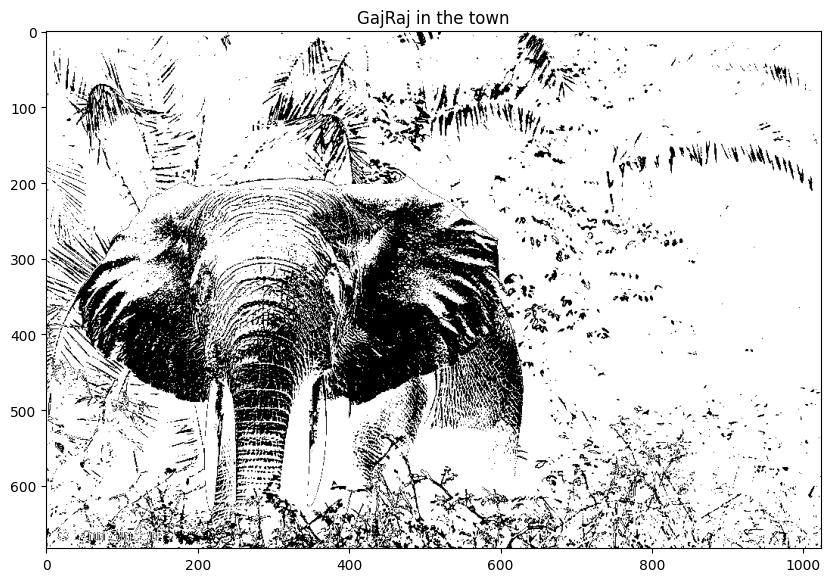

In [22]:
lower_thresh =[47,46,52]
upper_thresh = [142,134,155]

height = img_rgb.shape[0]
width = img_rgb.shape[1]

elephant_detected= np.ones((height,width),dtype=np.uint8)*255

for y in range(height):
  for x in range(width):
    pixel=img_rgb[y,x]
    r,g,b=pixel[0],pixel[1],pixel[2]

    if(lower_thresh[0]<=r<=upper_thresh[0] and lower_thresh[1]<=g<=upper_thresh[1] and lower_thresh[2]<=b<=upper_thresh[2]):
      elephant_detected[y,x]=0
    else:
      elephant_detected[y,x]=255

plt.figure(figsize=(10, 8))
plt.imshow(elephant_detected,cmap='gray')
plt.title("GajRaj in the town")
plt.axis("on")
plt.show()

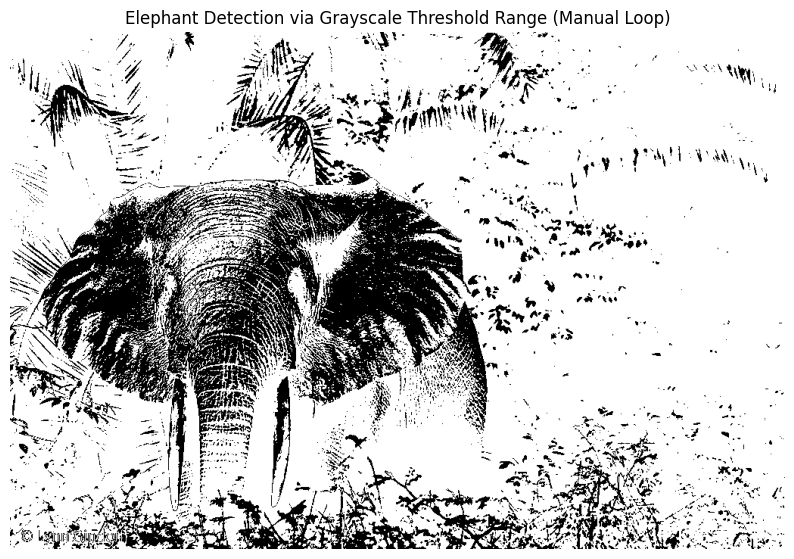

In [23]:
# Convert image to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 3: Apply threshold range manually
lower_thresh = 70
upper_thresh = 180

height = gray_image.shape[0]
width = gray_image.shape[1]

# Create a blank image for thresholded output
thresholded = np.zeros((height, width), dtype=np.uint8)

# Loop through each pixel
for y in range(height):
    for x in range(width):
        pixel_value = gray_image[y, x]
        if lower_thresh <= pixel_value <= upper_thresh:
            thresholded[y, x] = 0  # Inside range (elephant)
        else:
            thresholded[y, x] = 255    # Outside range (background)

# Step 4: Display the result
plt.figure(figsize=(10, 8))
plt.imshow(thresholded, cmap='gray')
plt.title("Elephant Detection via Grayscale Threshold Range (Manual Loop)")
plt.axis("off")
plt.show()